# NBA CAPSTONE WEB SCRAPING - TWITTER/NBA

In [13]:
# Import Statements

import pandas as pd
import numpy as np
import snscrape.modules.twitter as sntwitter
import os
import json

In [14]:
# Twitter API Key Access
consumer_key = 
consumer_secret = 
access_token = 
access_token_secret = 

## NBA

In [15]:
# Initiliaze Twitter Accounts 
twitter_handles = ['NBA']

# Initialize Start/End Scrape Dates
date1 = '2021-01-01'
date2 = '2021-11-01'
# query below scrapes from date1 to date2 for team and saves it in team.json
query = '''snscrape --jsonl --since {date1} twitter-search "from:{team} until:{date2}" > {team}.json'''
#os.system('"snscrape --jsonl --since {date1} twitter-search "from:{team} until:{date2}" > {team}.json"')


In [16]:
# Initialize DataFrame
team_tweets = pd.DataFrame([], columns=['Datetime',' Text', 'Username',
                                                'ReplyCount','LikeCount','RetweetCount', 'QuoteCount', 'Media', 'Hashtags', 'MentionedUsers'])

In [17]:
# Setting Date Boundaries, Initiliazing DB
#empty dataframe with columns
for team in twitter_handles: 
    print(team)
    # Creating list to append tweet data to
    tweets_list = []

    # Using TwitterSearchScraper to scrape data and append tweets to list
    team_twitter_query = sntwitter.TwitterSearchScraper('from:{team} since:{date1} until:{date2}'.format(date1=date1, date2=date2, team=team))
    for i,tweet in enumerate(team_twitter_query.get_items()):
        tweets_list.append([tweet.date, tweet.renderedContent, tweet.user.username,tweet.replyCount, tweet.likeCount, tweet.retweetCount, tweet.quoteCount,
                             tweet.media,tweet.hashtags,tweet.mentionedUsers])
    # Creating a dataframe from the tweets list above
    tweets_df = pd.DataFrame(tweets_list, columns=['Datetime', 'Text', 'Username',
                                                'ReplyCount','LikeCount','RetweetCount','QuoteCount','Media',
                                                     'Hashtags','MentionedUsers'])
    print(tweets_df.shape)
    team_tweets = pd.concat([team_tweets,tweets_df])
    


NBA
(16698, 10)


In [19]:
df = tweets_df
df = df.rename(columns = {"Datetime":"created_at", "Text":"text", "Username":"username", "ReplyCount":"reply_count",
                          "LikeCount":"favorite_count", "RetweetCount":"retweet_count",
                          "Media":"media", "Hashtags":"hashtags", "MentionedUsers":"mentions"})
                     
                     
                     
                     

In [20]:
df

,created_at,text,username,reply_count,favorite_count,retweet_count,QuoteCount,media,hashtags,mentions
0,2021-10-31 23:38:57+00:00,🕸️🕸️🕸️\n\nSpida 3-3 from deep after 1Q.. @utah...,NBA,8,1164,62,2,[Photo(previewUrl='https://pbs.twimg.com/media...,None,"[https://twitter.com/utahjazz, https://twitter..."
1,2021-10-31 23:21:32+00:00,Length on length at the rim!\n\nGiannis with t...,NBA,45,2130,219,113,[Video(thumbnailUrl='https://pbs.twimg.com/ext...,None,[https://twitter.com/NBATV]
2,2021-10-31 22:02:22+00:00,🎃 FINAL SCORE THREAD 🎃\n\nLuka's double-double...,NBA,44,4411,352,33,[Photo(previewUrl='https://pbs.twimg.com/media...,None,[https://twitter.com/dallasmavs]
3,2021-10-31 21:41:03+00:00,💫 LOGO LUKA 💫\n\nBig shot for the Mavericks.. ...,NBA,61,3818,560,198,[Video(thumbnailUrl='https://pbs.twimg.com/ext...,None,None
4,2021-10-31 20:39:52+00:00,"16 PTS, 5 AST for Luka at halftime.\n\n@dallas...",NBA,18,825,79,10,[Video(thumbnailUrl='https://pbs.twimg.com/amp...,None,"[https://twitter.com/dallasmavs, https://twitt..."
...,...,...,...,...,...,...,...,...,...,...
16693,2021-01-01 00:31:25+00:00,"RUSS (20 PTS, 10 REB, 11 AST) grabs the board ...",NBA,7,267,16,12,None,None,[https://twitter.com/WashWizards]
16694,2021-01-01 00:28:44+00:00,🚨 1-point game in Washington! 🚨\n\n@chicagobul...,NBA,14,446,27,5,None,None,"[https://twitter.com/chicagobulls, https://twi..."
16695,2021-01-01 00:21:48+00:00,John Wall goes to his lefty spike for his 1st ...,NBA,23,2367,197,31,[Video(thumbnailUrl='https://pbs.twimg.com/med...,None,None
16696,2021-01-01 00:18:16+00:00,😳 THOMAS. BRYANT. 😳\n\n1-point game with 5 min...,NBA,14,876,65,3,[Video(thumbnailUrl='https://pbs.twimg.com/med...,None,None


In [21]:
# Data manipulation - breaking down datetime to get individual components
import datetime
from datetime import datetime
df['created_at'] = df['created_at'].dt.tz_convert('US/Eastern')  
df['time'] = df['created_at'].dt.time
df['hour'] = df['created_at'].dt.hour
df['date'] = df['created_at'].dt.date
df['day_of_week'] = df['created_at'].dt.dayofweek
df['day_of_week_num'] = df['day_of_week'].copy()
df["day_of_week"].replace({0: "Monday", 1: "Tuesday", 2: "Wednesday", 3:"Thursday", 4: "Friday", 5: "Saturday", 6: "Sunday"}, inplace=True)

In [22]:
df.to_csv('NBA_tweets.csv')

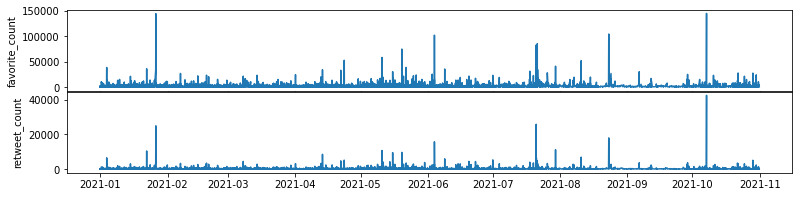

In [23]:
# plotting tweets by date
import matplotlib.pyplot as plt

ylabels = ["favorite_count","retweet_count"]

fig = plt.figure(figsize=(13,3))
fig.subplots_adjust(hspace=0.01,wspace=0.01)

n_row = len(ylabels)
n_col = 1
for count, ylabel in enumerate(ylabels):
    ax = fig.add_subplot(n_row,n_col,count+1)
    ax.plot(df["created_at"],df[ylabel])
    ax.set_ylabel(ylabel)
plt.show()

In [24]:
# looking at the peaks

df_sub = df.loc[(df["favorite_count"] > 2000) & (df["retweet_count"] > 5000),:]
for irow in range(df_sub.shape[0]):
    df_row = df_sub.iloc[irow,:]
    
    print(df_row["created_at"])
    print("favorite_count={:6} retweet_count={:6}".format(df_row["favorite_count"],df_row["retweet_count"]))
    print(df_row["text"])
    print("\n")
    


2021-10-28 20:41:34-04:00
favorite_count= 27553 retweet_count=  5088
Jalen Green and Jordan Clarkson become the first two players of Filipino descent to share the court in an NBA game! 🇵🇭 https://t.co/waKSIfVwCA


2021-10-07 12:09:46-04:00
favorite_count=144595 retweet_count= 42428
Welcome to NBA Lane. #NBA75 https://t.co/SOCCOBj1RB


2021-08-23 11:30:00-04:00
favorite_count= 35328 retweet_count= 10398
💜💛 8.23.78

"Once upon a time..."

https://t.co/WbzQdgD2Sv


2021-08-23 10:30:00-04:00
favorite_count=104172 retweet_count= 17942
Remembering Kobe 💜💛 8.23.78 https://t.co/WMrSxoht4D


2021-08-10 17:10:00-04:00
favorite_count= 51885 retweet_count=  6897
0⃣ @russwest44 x @Lakers https://t.co/3ZgWnysuIz


2021-07-29 21:38:21-04:00
favorite_count= 41066 retweet_count= 11107
With the next pick in the 2021 NBA Draft, the NBA selects Terrence Clarke from the University of Kentucky. #LLTC5 💙🤍 https://t.co/fJYvShrgK3


2021-07-21 01:39:59-04:00
favorite_count= 59811 retweet_count=  6494
Giannis b

In [25]:
# import seaborn for visualization
import seaborn as sns
from matplotlib import pyplot

<AxesSubplot:xlabel='day_of_week', ylabel='Count'>

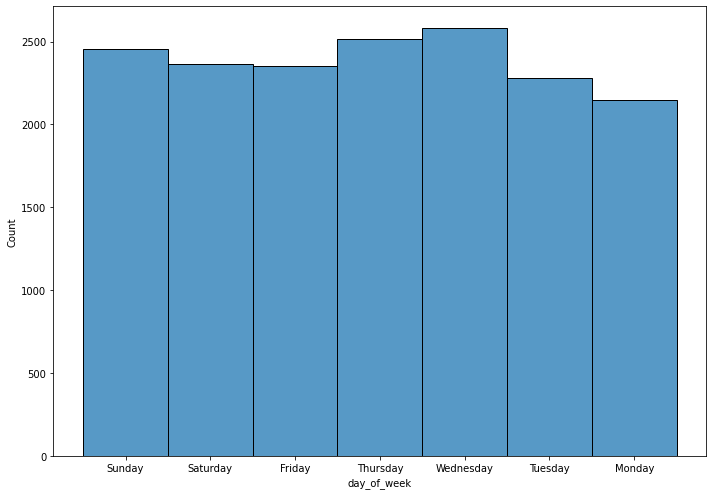

In [26]:
# histogram for day of_ week
a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.histplot(data=df, x="day_of_week", kde=False)

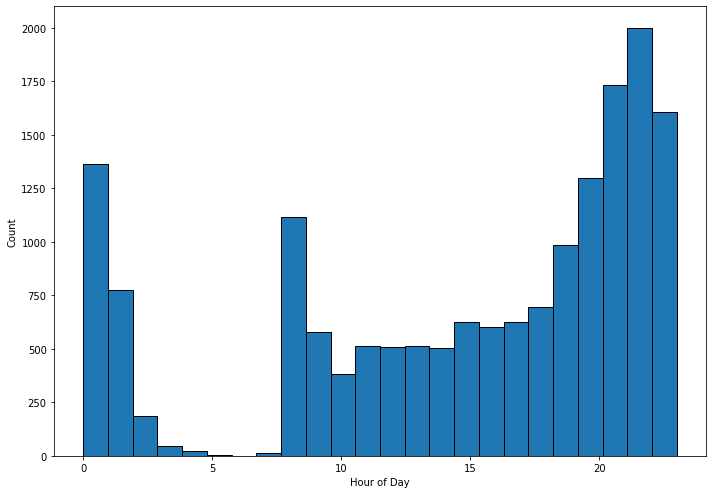

In [27]:
# scatter plot with hour of day, retweet count
a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)

# Set the ticks to be at the edges of the bins.

plt.hist(df['hour'], bins = 24, ec="black")

plt.xticks(fontsize = 10)

plt.xlabel("Hour of Day")
plt.ylabel("Count")
plt.show()

(0.0, 5000.0)

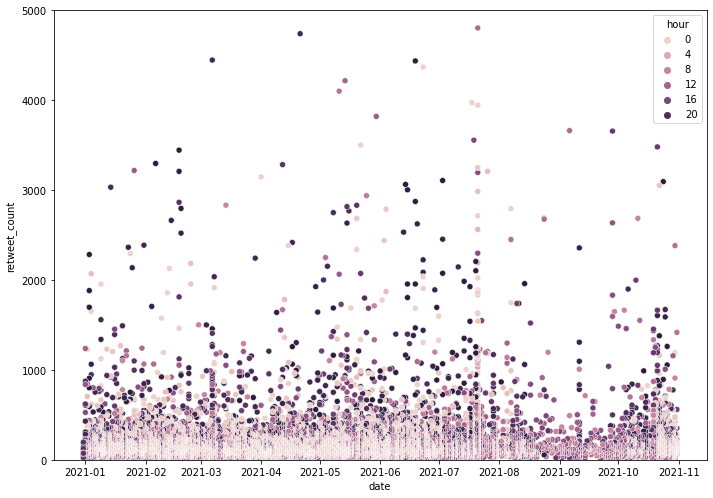

In [28]:
# scatter plot with created_at, retweet count
a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.scatterplot(x=df['date'], y=df["retweet_count"], hue =df['hour'])
plt.ylim(0, 5000)

(0.0, 40000.0)

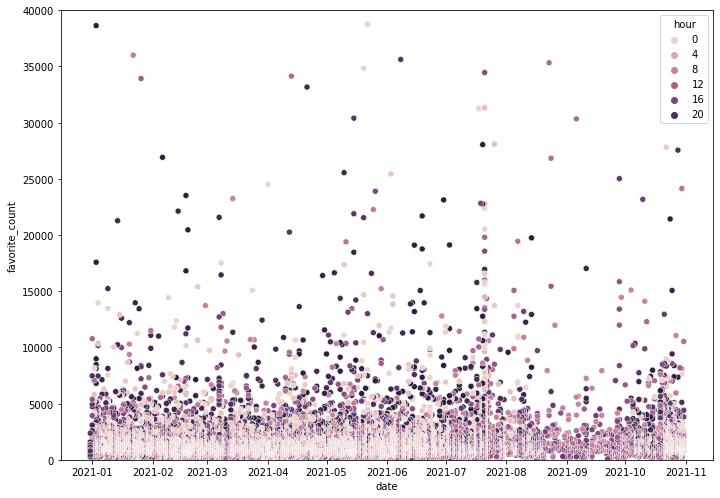

In [29]:
# scatter plot with created_at, favorite count
a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.scatterplot(x=df["date"], y=df["favorite_count"], hue=df['hour'])
plt.ylim(0, 40000)

(0.0, 30000.0)

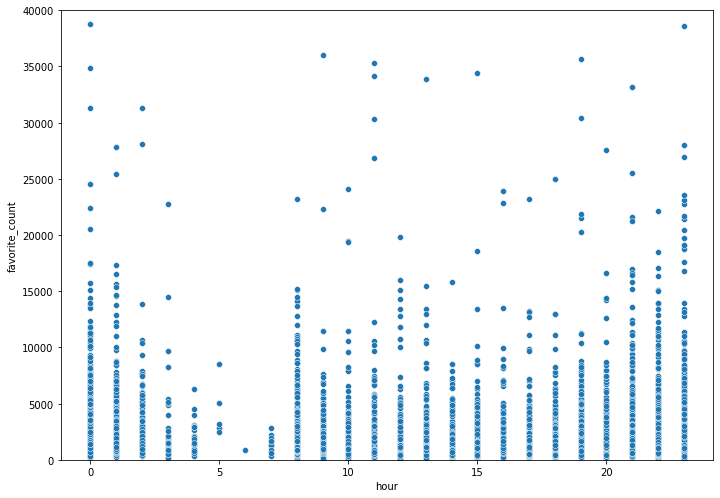

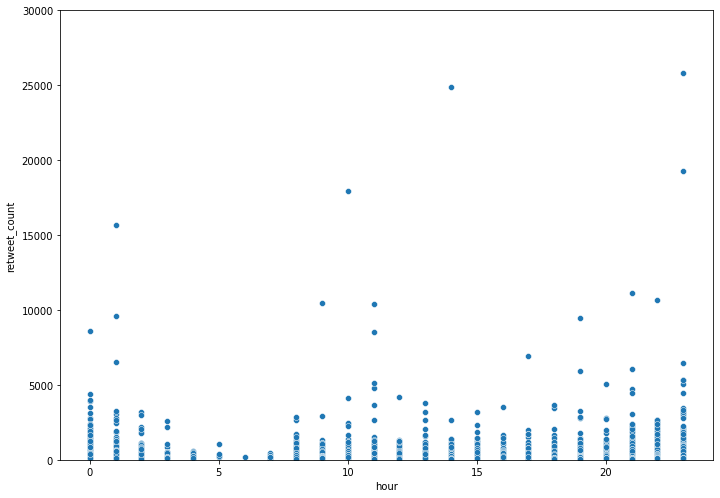

In [30]:
# scatter plot with hour, favorite count
a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.scatterplot(x=df["hour"], y=df["favorite_count"])
plt.ylim(0, 40000)

a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.scatterplot(x=df["hour"], y=df["retweet_count"])
plt.ylim(0, 30000)

In [31]:
# import sklearn for modeling
import statsmodels.api as sm
from sklearn import linear_model


<AxesSubplot:xlabel='date', ylabel='retweet_count'>

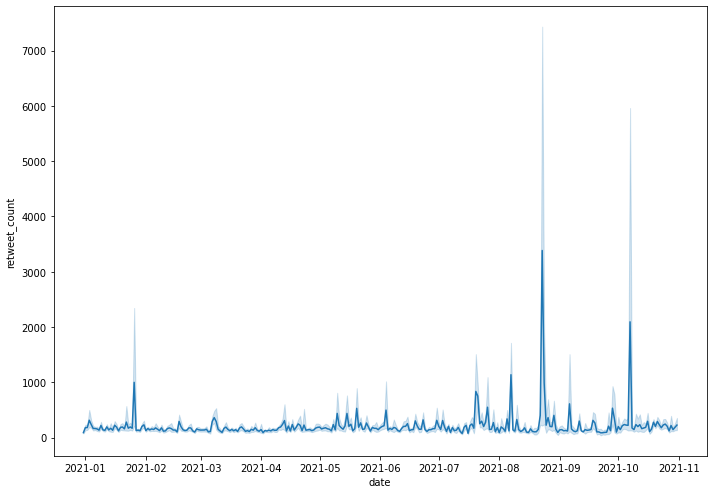

In [32]:
a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.lineplot(x = "date", y = "retweet_count",data = df)

In [33]:
df

,created_at,text,username,reply_count,favorite_count,retweet_count,QuoteCount,media,hashtags,mentions,time,hour,date,day_of_week,day_of_week_num
0,2021-10-31 19:38:57-04:00,🕸️🕸️🕸️\n\nSpida 3-3 from deep after 1Q.. @utah...,NBA,8,1164,62,2,[Photo(previewUrl='https://pbs.twimg.com/media...,None,"[https://twitter.com/utahjazz, https://twitter...",19:38:57,19,2021-10-31,Sunday,6
1,2021-10-31 19:21:32-04:00,Length on length at the rim!\n\nGiannis with t...,NBA,45,2130,219,113,[Video(thumbnailUrl='https://pbs.twimg.com/ext...,None,[https://twitter.com/NBATV],19:21:32,19,2021-10-31,Sunday,6
2,2021-10-31 18:02:22-04:00,🎃 FINAL SCORE THREAD 🎃\n\nLuka's double-double...,NBA,44,4411,352,33,[Photo(previewUrl='https://pbs.twimg.com/media...,None,[https://twitter.com/dallasmavs],18:02:22,18,2021-10-31,Sunday,6
3,2021-10-31 17:41:03-04:00,💫 LOGO LUKA 💫\n\nBig shot for the Mavericks.. ...,NBA,61,3818,560,198,[Video(thumbnailUrl='https://pbs.twimg.com/ext...,None,None,17:41:03,17,2021-10-31,Sunday,6
4,2021-10-31 16:39:52-04:00,"16 PTS, 5 AST for Luka at halftime.\n\n@dallas...",NBA,18,825,79,10,[Video(thumbnailUrl='https://pbs.twimg.com/amp...,None,"[https://twitter.com/dallasmavs, https://twitt...",16:39:52,16,2021-10-31,Sunday,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16693,2020-12-31 19:31:25-05:00,"RUSS (20 PTS, 10 REB, 11 AST) grabs the board ...",NBA,7,267,16,12,None,None,[https://twitter.com/WashWizards],19:31:25,19,2020-12-31,Thursday,3
16694,2020-12-31 19:28:44-05:00,🚨 1-point game in Washington! 🚨\n\n@chicagobul...,NBA,14,446,27,5,None,None,"[https://twitter.com/chicagobulls, https://twi...",19:28:44,19,2020-12-31,Thursday,3
16695,2020-12-31 19:21:48-05:00,John Wall goes to his lefty spike for his 1st ...,NBA,23,2367,197,31,[Video(thumbnailUrl='https://pbs.twimg.com/med...,None,None,19:21:48,19,2020-12-31,Thursday,3
16696,2020-12-31 19:18:16-05:00,😳 THOMAS. BRYANT. 😳\n\n1-point game with 5 min...,NBA,14,876,65,3,[Video(thumbnailUrl='https://pbs.twimg.com/med...,None,None,19:18:16,19,2020-12-31,Thursday,3


Text(0.5, 1.0, 'Average Favorite Count by Hour of Day @NBA')

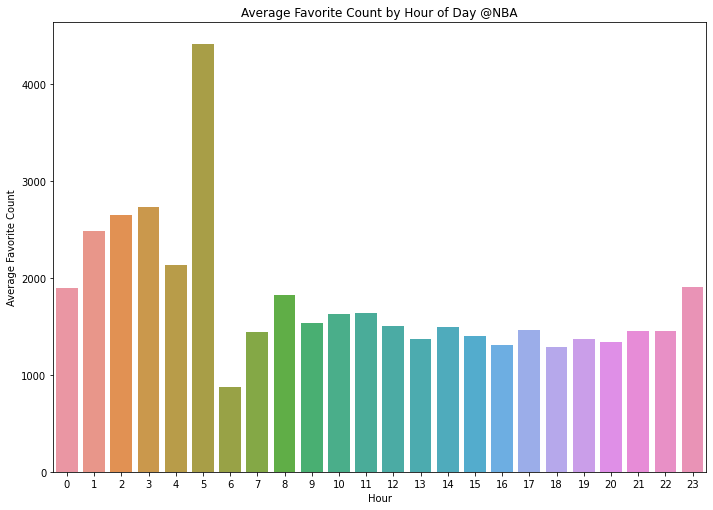

In [34]:
a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
ax = sns.barplot(x = 'hour',
            y = 'favorite_count',
            data = df,
            estimator = np.mean,
            ci = 0)
ax.set(xlabel='Hour', ylabel='Average Favorite Count')
ax.set_title("Average Favorite Count by Hour of Day @NBA")

Text(0.5, 1.0, 'Average Favorite Count by Day of the Week @NBA')

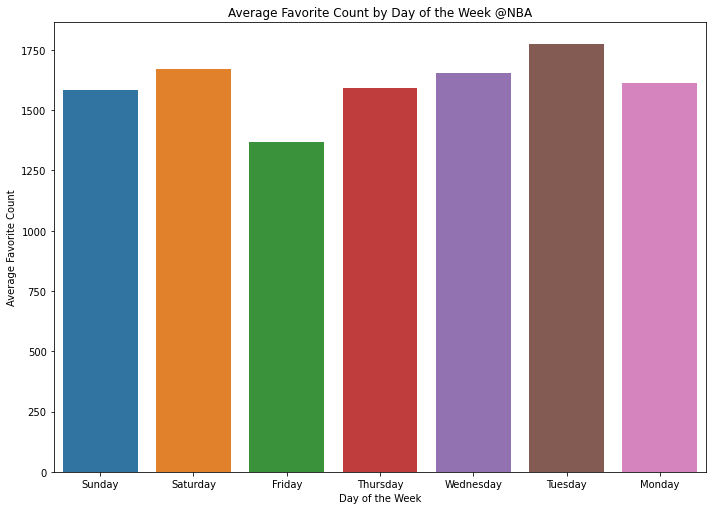

In [35]:
a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
ax = sns.barplot(x = 'day_of_week',
            y = 'favorite_count',
            data = df,
            estimator = np.mean,
            ci = 0)
ax.set(xlabel='Day of the Week', ylabel='Average Favorite Count')
ax.set_title("Average Favorite Count by Day of the Week @NBA")

In [22]:
# MODEL - Retweet count ~ hour
df['day_of_week_num'] = df['day_of_week_num'].astype("category")
X = df[['hour', 'day_of_week_num']]
y = df['retweet_count']

regr = linear_model.LinearRegression()
regr.fit(X, y)
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 229.29461685802278
Coefficients: 
 [-1.75068123 -6.27184351]
                            OLS Regression Results                            
Dep. Variable:          retweet_count   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     7.713
Date:                Wed, 24 Nov 2021   Prob (F-statistic):           0.000449
Time:                        16:12:42   Log-Likelihood:            -1.3103e+05
No. Observations:               16699   AIC:                         2.621e+05
Df Residuals:                   16696   BIC:                         2.621e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------

In [23]:
print("Correlation between hour and favorite count is: {:2}.".format(df['hour'].corr(df['favorite_count'])))
print("Correlation between day of week and favorite count is: {:2}.".format(df['day_of_week_num'].astype("category").corr(df['favorite_count'])))


print("Correlation between hour and retweet count is: {:2}.".format(df['hour'].corr(df['retweet_count'])))
print("Correlation between day of week and retweet count is: {:2}.".format(df['day_of_week_num'].astype("category").corr(df['retweet_count'])))

print("Correlation between hour and reply count is: {:2}.".format(df['hour'].corr(df['reply_count'])))
print("Correlation between day of week and reply count is: {:2}.".format(df['day_of_week_num'].astype("category").corr(df['reply_count'])))




Correlation between hour and favorite count is: -0.024725787754473386.
Correlation between day of week and favorite count is: -0.02274740855148889.
Correlation between hour and retweet count is: -0.022893836814612937.
Correlation between day of week and retweet count is: -0.020385035570378896.
Correlation between hour and reply count is: -0.01867395432649957.
Correlation between day of week and reply count is: -0.007055510331593894.


In [24]:
# MODEL - Favorite count ~ hour
df['day_of_week_num'] = df['day_of_week_num'].astype("category")
X = df[['hour', 'day_of_week_num']]
y = df['favorite_count']

regr = linear_model.LinearRegression()
regr.fit(X, y)
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

Intercept: 
 1818.2897594579129
Coefficients: 
 [-10.02369502 -37.14768299]
                            OLS Regression Results                            
Dep. Variable:         favorite_count   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     9.266
Date:                Wed, 24 Nov 2021   Prob (F-statistic):           9.50e-05
Time:                        16:12:42   Log-Likelihood:            -1.5889e+05
No. Observations:               16699   AIC:                         3.178e+05
Df Residuals:                   16696   BIC:                         3.178e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

## Large Market NBA Teams

In [28]:
# Initiliaze Twitter Accounts 
twitter_handles_teams = ['nyknicks', 'Lakers', 'dallasmavs', 'warriors', 'chicagobulls']

# Initialize Start/End Scrape Dates
date1 = '2021-01-01'
date2 = '2021-11-01'
# query below scrapes from date1 to date2 for team and saves it in team.json
query = '''snscrape --jsonl --since {date1} twitter-search "from:{team} until:{date2}" > {team}.json'''
#os.system('"snscrape --jsonl --since {date1} twitter-search "from:{team} until:{date2}" > {team}.json"')


In [29]:
# Initialize DataFrame
team_tweets = pd.DataFrame([], columns=['Datetime',' Text', 'Username',
                                                'ReplyCount','LikeCount','RetweetCount',])

In [30]:
# Setting Date Boundaries, Initiliazing DB
#empty dataframe with columns
for team in twitter_handles_teams: 
    print(team)
    # Creating list to append tweet data to
    tweets_list = []

    # Using TwitterSearchScraper to scrape data and append tweets to list
    team_twitter_query = sntwitter.TwitterSearchScraper('from:{team} since:{date1} until:{date2}'.format(date1=date1, date2=date2, team=team))
    for i,tweet in enumerate(team_twitter_query.get_items()):
        tweets_list.append([tweet.date, tweet.renderedContent, tweet.user.username,tweet.replyCount, tweet.likeCount, tweet.retweetCount])
    # Creating a dataframe from the tweets list above
    tweets_df = pd.DataFrame(tweets_list, columns=['Datetime', 'Text', 'Username',
                                                'ReplyCount','LikeCount','RetweetCount'])
    print(tweets_df.shape)
    team_tweets = pd.concat([team_tweets,tweets_df])
    

nyknicks
(5582, 6)
Lakers
(3238, 6)
dallasmavs
(3524, 6)
warriors
(4765, 6)
chicagobulls
(3608, 6)


In [43]:
df_teams = team_tweets
df_teams = df_teams.rename(columns = {"Datetime":"created_at", "Text":"text", "Username":"username", "ReplyCount":"reply_count", "LikeCount":"favorite_count", "RetweetCount":"retweet_count"})
     

In [46]:
df_teams

,created_at,Text,username,reply_count,favorite_count,retweet_count,text
0,2021-10-31 21:15:00+00:00,NaN,nyknicks,23,1973,251,5-1 in October.\n\nThe top five plays of the m...
1,2021-10-31 19:00:01+00:00,NaN,nyknicks,7,613,51,Taking the right threes.\n\n19 for 33 last nig...
2,2021-10-31 16:00:01+00:00,NaN,nyknicks,12,3368,304,Moeller High School to the big leagues 🤝\n\n@d...
3,2021-10-31 15:15:00+00:00,NaN,nyknicks,27,2130,230,35 points on 65% shooting. Sheesh.\n\n@RjBarre...
4,2021-10-31 14:45:00+00:00,NaN,nyknicks,3,816,57,High praise from Coach on RJ. https://t.co/6JE...
...,...,...,...,...,...,...,...
3603,2021-01-01 00:45:34+00:00,NaN,chicagobulls,38,2456,173,"Enjoy your NYE, Chicago! ❤️🖤 https://t.co/Iv4m..."
3604,2021-01-01 00:38:44+00:00,NaN,chicagobulls,119,4142,2300,RT FOR GOOD LUCK IN 2021. https://t.co/z8qe8vCOQ0
3605,2021-01-01 00:37:52+00:00,NaN,chicagobulls,113,10137,755,BYE 2020.\n\nWE'LL TAKE A WIN ON THE WAY OUT.
3606,2021-01-01 00:34:07+00:00,NaN,chicagobulls,65,946,40,We're up 131-128. 14.2 seconds left.\n\nHow we...


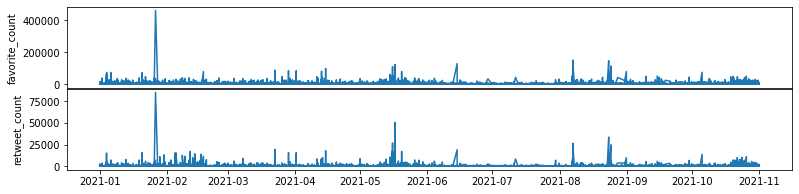

In [49]:
# plotting tweets by date
import matplotlib.pyplot as plt

ylabels = ["favorite_count","retweet_count"]

fig = plt.figure(figsize=(13,3))
fig.subplots_adjust(hspace=0.01,wspace=0.01)

n_row = len(ylabels)
n_col = 1
for count, ylabel in enumerate(ylabels):
    ax = fig.add_subplot(n_row,n_col,count+1)
    ax.plot(df_teams["created_at"],df_teams[ylabel])
    ax.set_ylabel(ylabel)
plt.show()

In [51]:
# looking at the peaks

df_sub = df_teams.loc[(df_teams["favorite_count"] > 1000) & (df_teams["retweet_count"] > 5000),:]
for irow in range(df_sub.shape[0]):
    df_row = df_sub.iloc[irow,:]
    
    print(df_row["created_at"])
    print("favorite_count={:6} retweet_count={:6}".format(df_row["favorite_count"],df_row["retweet_count"]))
    print(df_row["text"])
    print("\n")
    

2021-05-13 02:50:29+00:00
favorite_count= 32826 retweet_count=  5368
CODY, WE DID IT.


2021-05-13 02:30:09+00:00
favorite_count= 15695 retweet_count=  5197
WE HERE.

The New York Knicks are headed to the Playoffs. #NewYorkForever https://t.co/kpp3Pu3RJr


2021-01-28 18:20:00+00:00
favorite_count=  3242 retweet_count=  5062
🚨 RT TO VOTE JULIUS RANDLE FOR #NBAALLSTAR https://t.co/hxw4Dip3Cl


2021-10-25 04:05:07+00:00
favorite_count= 37291 retweet_count=  6941
#LakersWin


2021-10-21 22:35:36+00:00
favorite_count= 46474 retweet_count=  9867
Mamba Forever #NBA75 https://t.co/DTtKqTbJ5A


2021-10-19 22:18:59+00:00
favorite_count= 49339 retweet_count=  7027
Bron Wick 👑 https://t.co/Y9xqtCb5Ki


2021-10-05 16:19:55+00:00
favorite_count= 74436 retweet_count= 13558
A hero in Los Angeles. A hoops legend around the world. 

Congrats on your retirement, Pau. https://t.co/ODzWHXgq94


2021-09-29 17:47:27+00:00
favorite_count= 44295 retweet_count=  6670
#LakeShow 360° https://t.co/BD7mOr9Ovg


202

In [52]:
df_teams['time'] = df_teams['created_at'].dt.time
df_teams['hour'] = df_teams['created_at'].dt.hour
df_teams['date'] = df_teams['created_at'].dt.date
df_teams['day_of_week'] = df_teams['created_at'].dt.dayofweek
df_teams['day_of_week_num'] = df_teams['day_of_week'].copy()
df_teams["day_of_week"].replace({0: "Monday", 1: "Tuesday", 2: "Wednesday", 3:"Thursday", 4: "Friday", 5: "Saturday", 6: "Sunday"}, inplace=True)

(0.0, 20000.0)

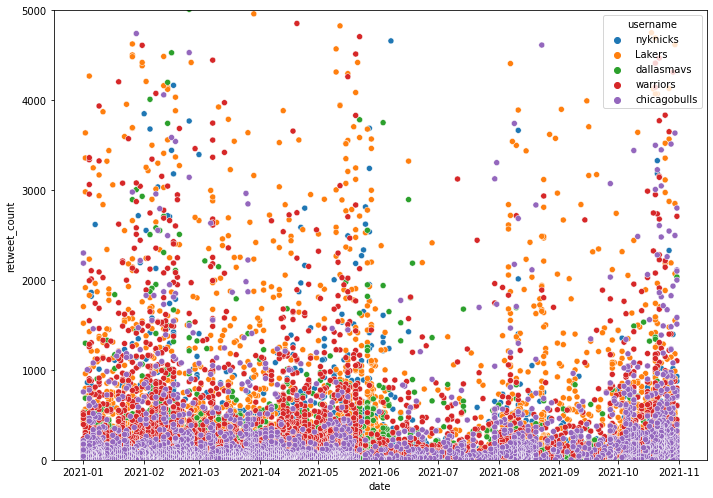

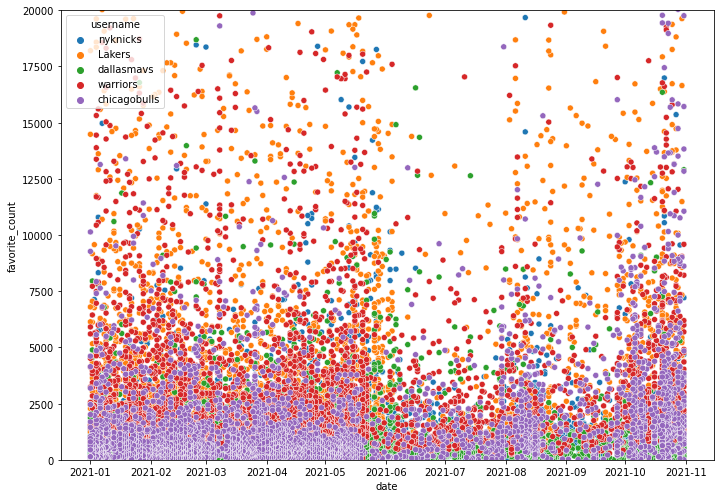

In [64]:
# scatter plot with created_at, retweet count
a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.scatterplot(x=df_teams['date'], y=df_teams["retweet_count"], hue =df_teams['username'])
plt.ylim(0, 5000)

# scatter plot with created_at, favorite count
a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.scatterplot(x=df_teams['date'], y=df_teams["favorite_count"], hue =df_teams['username'])
plt.ylim(0, 20000)

(0.0, 20000.0)

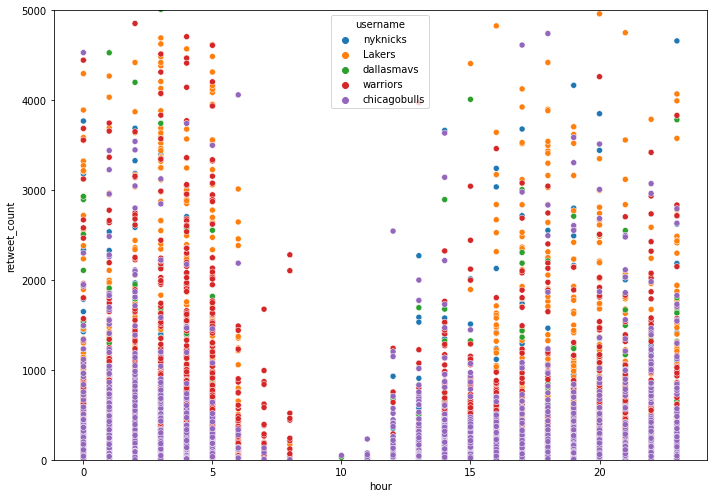

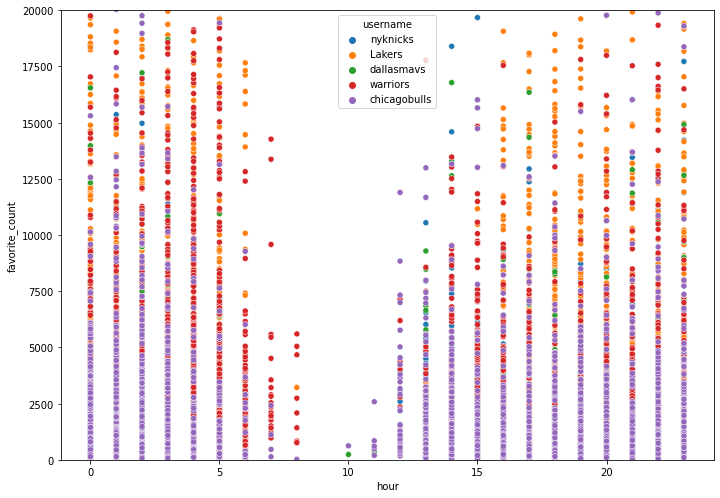

In [65]:
# scatter plot with created_at, retweet count
a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.scatterplot(x=df_teams['hour'], y=df_teams["retweet_count"], hue =df_teams['username'])
plt.ylim(0, 5000)

a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.scatterplot(x=df_teams['hour'], y=df_teams["favorite_count"], hue =df_teams['username'])
plt.ylim(0, 20000)

In [60]:
df_teams

,created_at,Text,username,reply_count,favorite_count,retweet_count,text,time,hour,date,day_of_week,day_of_week_num
0,2021-10-31 21:15:00+00:00,NaN,nyknicks,23,1973,251,5-1 in October.\n\nThe top five plays of the m...,21:15:00,21,2021-10-31,Sunday,6
1,2021-10-31 19:00:01+00:00,NaN,nyknicks,7,613,51,Taking the right threes.\n\n19 for 33 last nig...,19:00:01,19,2021-10-31,Sunday,6
2,2021-10-31 16:00:01+00:00,NaN,nyknicks,12,3368,304,Moeller High School to the big leagues 🤝\n\n@d...,16:00:01,16,2021-10-31,Sunday,6
3,2021-10-31 15:15:00+00:00,NaN,nyknicks,27,2130,230,35 points on 65% shooting. Sheesh.\n\n@RjBarre...,15:15:00,15,2021-10-31,Sunday,6
4,2021-10-31 14:45:00+00:00,NaN,nyknicks,3,816,57,High praise from Coach on RJ. https://t.co/6JE...,14:45:00,14,2021-10-31,Sunday,6
...,...,...,...,...,...,...,...,...,...,...,...,...
3603,2021-01-01 00:45:34+00:00,NaN,chicagobulls,38,2456,173,"Enjoy your NYE, Chicago! ❤️🖤 https://t.co/Iv4m...",00:45:34,0,2021-01-01,Friday,4
3604,2021-01-01 00:38:44+00:00,NaN,chicagobulls,119,4142,2300,RT FOR GOOD LUCK IN 2021. https://t.co/z8qe8vCOQ0,00:38:44,0,2021-01-01,Friday,4
3605,2021-01-01 00:37:52+00:00,NaN,chicagobulls,113,10137,755,BYE 2020.\n\nWE'LL TAKE A WIN ON THE WAY OUT.,00:37:52,0,2021-01-01,Friday,4
3606,2021-01-01 00:34:07+00:00,NaN,chicagobulls,65,946,40,We're up 131-128. 14.2 seconds left.\n\nHow we...,00:34:07,0,2021-01-01,Friday,4
